In [1]:
from google.colab import drive 
drive.mount("/content/drive/")
import pandas as pd
import os 
import re
import json
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd")
from zipfile import ZipFile
import zipfile
import statistics
from statistics import mean
import collections
from collections import Counter
from nltk.translate.bleu_score import SmoothingFunction, sentence_bleu

Mounted at /content/drive/


In [2]:
!pip install transformers
!pip install -U sentence-transformers
!pip install transformers[sentencepiece]
from sentence_transformers import SentenceTransformer, util
from transformers import pipeline, AutoTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 94.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=4bfed6bc8829abcb67c84618ed0f551aa5670ca215752208dfa11a262029d26d
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers
Looking in indexes: https://pypi.o

# **SETUP**

In [3]:
! pip install pingouin 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=489986ce341cb763a9fe314e6bc8461f146017940e92348fac5c7ebc314a1c8b
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [4]:
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 51.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895259 sha256=d1d162a8c63e2a9ecd19073ad51e1da5bda55f3f411999485a76aa8469ac94e2
  Stored in directory: /root/.cache/pip/wheels/12/1c/3d/46cf06718d63a32ff798a89594b61e7f345ab6b36d909ce033
Successfully built sacremoses


In [5]:
!pip install sacrebleu
import sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 13.1 MB/s eta 0:00:00


In [6]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, util
from transformers import pipeline


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from sentence_transformers import SentenceTransformer
model_ = SentenceTransformer('bert-base-nli-mean-tokens')

In [9]:
!pip install --upgrade bleu
import bleu
from bleu import list_bleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bleu: filename=bleu-0.3-py3-none-any.whl size=5799 sha256=cb6b77ab4e565d80fc91539818f9b22ebb4c48c5982731090d02a74af6147fb2
  Stored in directory: /root/.cache/pip/wheels/78/bf/47/ded78149e63219f4666fba6ffc55697b8db6282c87d6370a7e
  Created wheel for efficiency: filename=efficiency-1.1-py3-none-any.whl size=22157 sha256=2d4cd1e534289dade2bd5af8c5acde8b8349eb27d9480a4b2a00ad5d685782d5
  Stored in directory: /root/.cache/pip/wheels/b1/46/0d/82133b0346045c28acaa24d9e2def1044e92441ffaae95f252
Successfully built bleu efficiency


In [10]:
from nltk.translate.bleu_score import sentence_bleu

def compute_scar_score(list_):

  bleu = []
  scar = []
  cc = SmoothingFunction()

  for i, l_ in enumerate(list_):

    reference = list_[i][0]

    translation = list_[i][1]

    bleu_score = sentence_bleu(reference, translation, weights=(0.5, 0.5, 0, 0),smoothing_function= cc.method3)
    
    bleu.append(round(bleu_score, 2))

    
  return mean(bleu) , bleu 


 



In [11]:
import statistics
from statistics import mean

def compute_similarity(list_):

  similarity = []
  for l_ in list_:
    sentence_embeddings = model_.encode(l_)
    similarity.append(round(util.pytorch_cos_sim(sentence_embeddings[0], sentence_embeddings[1]).item(), 2))


  return mean(similarity), similarity 

# **TRANSLATION**

**ROMANCE - SLAVIC : fr-bg**

In [ ]:
import glob

def romance_slavic_translators(path):    #TAKES A PATH TO FILE AS ARGUMRNT,  

  """ it takes a path as argument. a multilanguage transaltion model (Helsinki-NLP/opus-mt-) is used to translate between 
  pairs of human-translated languages (like EN-ES). it  returns bleu and cosine similarity metrics metrics. """
  
  lang_id = path.split("/")[-1][0:5]                                              # language id 


  dataframe = pd.read_csv(path, index_col = 0).drop_duplicates().dropna()                            

  data_ = [ [sent1, sent2] for sent1, sent2 in zip(dataframe["original"], dataframe["translation"]) if  len(sent1.split()) >= 8 and  len(sent1.split()) <= 20  ]
                                                   
  original = [list_[0] for list_ in data_[:2003]]

  translation = [list_[1] for list_ in data_[:2003]]


  original = [sent.lower().replace("\xa0", "") for sent in original ]              

  originals = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in original ]               

  translation = [sent.lower().replace("\xa0", "") for sent in translation]   

  translation = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in translation ] 

  direct_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-bg" )


  sl_pivot_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-ru" )

    
  pivot_tl_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ru-bg" )

  direct_translation = [direct_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  sl_pivot = [sl_pivot_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  pivot_tl = [pivot_tl_translator(text, max_length=400) [0] ['translation_text'] for text in sl_pivot]
 
 

  return  originals, direct_translation, pivot_tl, translation 

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/data_gathering")

In [ ]:
pd.read_csv("fr-bg.csv", index_col   =  0)

original  \
0     abilify a également eu un effet comparable à c...   
1     cet effet a été maintenu pendant une période a...   
2     abilify a également été plus efficace que le p...   
3     les injections d’ abilify à des doses de 10 ou...   
4     quel est le risque associé à l'utilisation d'a...   
...                                                 ...   
2945               5.1 propriétés pharmacodynamiques en   
2946                       agent anti-obésité code atc:   
2947                                         a08ax01 am   
2948  le rimonabant est un antagoniste sélectif du r...   
2949  le système endocannabinoïde est un système phy...   

                                            translation  
0     освен това abilify има ефект, подобен на този ...  
1     този ефект се поддържа за максимален период от...  
2     abilify е също така по- ефективен от плацебо з...  
3     инжекциите abilify в дози от 10 или 15 mg са с...  
4               какви са рисковете, свързани с abilify?  
...                                                 ...  
2945                    5. 1 фармакодинамични свойства,  
2946                    средство против затлъстяване кт  
2947                                           atc код:  
2948  римонабант е селективен канабиноид- 1 рецептор...  
2949  фармакологичните ефекти на канабиноидните агон...  

[2950 rows x 2 columns]

In [ ]:
path_ = "/content/drive/MyDrive/tesi/chapters/2nd/data_gathering/fr-bg.csv"

original_sentences, direct_translation, pivot_translation, human_translation = romance_slavic_translators(path_)

Your input_length: 400 is bigger than 0.9 * max_length: 400. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 399 is bigger than 0.9 * max_length: 400. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 401 is bigger than 0.9 * max_length: 400. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 399 is bigger than 0.9 * max_length: 400. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 398 is bigger than 0.9 * max_length: 400. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"original":  original_sentences , "direct_translation": direct_translation, "pivot_translation": pivot_translation, "human_translation": human_translation}).to_csv("romance_slavic_fr_bg.csv")

In [ ]:
pd.read_csv("romance_slavic_fr_bg.csv", index_col = 0)

original  \
0     cet effet a été maintenu pendant une période a...   
1     quel est le risque associé à l'utilisation d'a...   
2     l’ acathisie est plus fréquente chez les patie...   
3     pour une description complète des effets indés...   
4     le comité a recommandé l’ octroi d’ une autori...   
...                                                 ...   
1069  sa effets indésirables sur les paramètres biol...   
1070  plu les données liées au surdosage avec rimona...   
1071  il s’agissait de céphalées, euphorie, fatigue ...   
1072  le profil pharmacocinétique montre que l’expos...   
1073  fonctions cardiovasculaires et mesures symptom...   

                                     direct_translation  \
0     Този ефект е поддържан в продължение на 12 сед...   
1               Какви са рисковете, свързани с Abilify?   
2     акатизия е по- често срещана при пациенти с би...   
3     за пълния списък на всички наблюдавани при аби...   
4     Комитетът препоръчва на Alifi да бъде издадено...   
...                                                 ...   
1069  Не са наблюдавани промени в лабораторните пара...   
1070  Има ограничени данни за предозиране с римонабант.   
1071     Това са главоболие, еуфория, умора и безсъние.   
1072  фармакокинетичният профил показва, че експозиц...   
1073  сърдечно- съдови функции и общи поддържащи мерки.   

                                      pivot_translation  \
0     Тази цел е била запазена през периода до 12 се...   
1     Какви са рисковете, свързани с използването на...   
2     I) Акатизията се среща по – често сред пациент...   
3     Пълно описание на нежеланите последствия, коит...   
4     Комитетът препоръчва да се осигури разрешение ...   
...                                                 ...   
1069  Нежелателното му въздействие върху биологичнит...   
1070     Данните, свързани с римонабант, са ограничени.   
1071          Той беше кафе, евфория, умора и безсъние.   
1072  Фармацевтичният профил показва, че ефектът дос...   
1073  c) сърдечносъдови функции, симптоматични мерки...   

                                      human_translation  
0     този ефект се поддържа за максимален период от...  
1               какви са рисковете, свързани с abilify?  
2     акатизията е по- честа реакция при пациенти с ...  
3     за пълния списък на всички наблюдавани при abi...  
4     комитетът препоръчва на abilify да бъде издаде...  
...                                                 ...  
1069    ше − стомашно- чревни нарушения: коремна болка.  
1070  аз 4. 9 предозиране ер опитът с римонабант при...  
1071  те включват главоболие, еуфория, умора и безсъ...  
1072  фармакокинетичният профил показва, че плато пр...  
1073  при предозиране, като поддържане на проходими ...  

[1074 rows x 4 columns]

**ENGLISH AS PIVOT**

In [20]:
def romance_slavic_translators(path):    #TAKES A PATH TO FILE AS ARGUMRNT,  

  """ it takes a path as argument. a multilanguage transaltion model (Helsinki-NLP/opus-mt-) is used to translate between 
  pairs of human-translated languages (like EN-ES). it  returns bleu and cosine similarity metrics metrics. """
  
  lang_id = path.split("/")[-1][0:5]                                              # language id 


  dataframe = pd.read_csv(path, index_col = 0).drop_duplicates().dropna()                            

  data_ = [ [sent1, sent2] for sent1, sent2 in zip(dataframe["original"], dataframe["translation"]) if  len(sent1.split()) >= 8 and  len(sent1.split()) <= 20  ]
                                                   
  original = [list_[0] for list_ in data_[:2003]]

  translation = [list_[1] for list_ in data_[:2003]]


  original = [sent.lower().replace("\xa0", "") for sent in original ]              

  originals = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in original ]               

  translation = [sent.lower().replace("\xa0", "") for sent in translation]   

  translation = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in translation ] 

  direct_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-bg" )


  sl_pivot_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en" )

    
  pivot_tl_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-bg" )

  direct_translation = [direct_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  sl_pivot = [sl_pivot_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  pivot_tl = [pivot_tl_translator(text, max_length=400) [0] ['translation_text'] for text in sl_pivot]
 
 

  return  originals, direct_translation, pivot_tl, translation 

In [21]:
path_ = "/content/drive/MyDrive/tesi/chapters/2nd/data_gathering/fr-bg.csv"

original_sentences, direct_translation, pivot_translation, human_translation = romance_slavic_translators(path_)

Your input_length: 399 is bigger than 0.9 * max_length: 400. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


In [22]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"original":  original_sentences , "direct_translation": direct_translation, "pivot_translation": pivot_translation, "human_translation": human_translation}).to_csv("romance_slavic_fr_bg_en_as_pivot.csv")

**GERRMANIC SLAVIC**

**en-uk**

In [ ]:
import glob

def germanic_slavic_translators(path):    #TAKES A PATH TO FILE AS ARGUMRNT,  

  """ it takes a path as argument. a multilanguage transaltion model (Helsinki-NLP/opus-mt-) is used to translate between 
  pairs of human-translated languages (like EN-ES). it  returns bleu and cosine similarity metrics metrics. """
  
  lang_id = path.split("/")[-1][0:5]                                              # language id 


  dataframe = pd.read_csv(path, index_col = 0).drop_duplicates().dropna()                         

  data_ = [ [sent1, sent2] for sent1, sent2 in zip(dataframe["original"], dataframe["translation"]) if len(sent1.split()) >= 8 and  len(sent1.split()) <= 20   ]
                                                   
  original = [list_[0] for list_ in data_ ]

  translation = [list_[1] for list_ in data_]


  original = [sent.lower().replace("\xa0", "") for sent in original ]              

  originals = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in original ]               

  translation = [sent.lower().replace("\xa0", "") for sent in translation]   

  translation = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in translation ] 

  direct_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-uk" )


  sl_pivot_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-ru" )

    
  pivot_tl_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ru-uk" )

  direct_translation = [direct_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  sl_pivot = [sl_pivot_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  pivot_tl = [pivot_tl_translator(text, max_length=400) [0] ['translation_text'] for text in sl_pivot]
 
 

  return  originals, direct_translation, pivot_tl, translation 

In [ ]:
pd.read_csv("/content/drive/MyDrive/tesi/chapters/2nd/data_gathering/en-uk.csv", index_col = 0)

original  \
0                                Like father, like son.   
1                                Like father, like son.   
2                                Like father, like son.   
3                                Like father, like son.   
4                      The early bird catches the worm.   
...                                                 ...   
2995                       What time should I check in?   
2996                       What time should I check in?   
2997  Can you please tell me what time the train lea...   
2998                    What time did you arrive there?   
2999                    What time did you arrive there?   

                                            translation  
0                  Яблучко від яблуньки недалеко падає.  
1                              Який батько - такий син.  
2                     Яблуко від яблуні недалеко падає.  
3                    Яблуко від яблуні далеко не падає.  
4                         Хто рано встає, тому бог дає.  
...                                                 ...  
2995       О котрій годині я повинен вселитися в номер?  
2996         О котрій годині я повинен зареєструватися?  
2997  Скажіть мені, будь ласка, о котрій годині від'...  
2998                   О котрій годині ти туди приїхав?  
2999                  О котрій годині ти туди приїхала?  

[3000 rows x 2 columns]

In [ ]:
path_ = "/content/drive/MyDrive/tesi/chapters/2nd/data_gathering/en-uk.csv"

original_sentences, direct_translation, pivot_translation, human_translation = germanic_slavic_translators(path_)

In [ ]:

os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"original":  original_sentences , "direct_translation": direct_translation, "pivot_translation": pivot_translation, "human_translation": human_translation}).to_csv("germanic_slavic_en_uk.csv")


In [ ]:
len(original_sentences) == len(direct_translation) ==len(pivot_translation) == len(human_translation ) 

True

In [ ]:
original_sentences

['the bleeding means her liver is still failing.',
 "-actually, i'm gonna go. -no. what?",
 "even if he can't talk back.",
 'yeah, when you fell off the ladder, you tore the ligament that connects the two.']

In [ ]:
direct_translation

['кровотечение значит, что печень все еще не работает.',
 '- Насправді, я піду.',
 'Даже если он не может отвечать.',
 "так, коли ти впав з драбини, ти порвав зв'язку, що з'єднувало їх."]

In [ ]:
pivot_translation

['Кровотечення означає, що її печінка все ще не працює.',
 '- Взагалі-то, я піду.',
 'Навіть якщо він не може відповісти.',
 'Так, коли ти впав зі сходів, то порвав зв’язок, який з’єднує їх.']

In [ ]:
human_translation

['значит, печень отказывает дальше.',
 'згідно з продажем моїх альбомів',
 'даже если он не может отвечать.',
 'да, когда вы упали с лестницы, вы разорвали соединяющее их сухожилие.']

In [ ]:
# os.mkdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")

**FRENCH AS PIVOT**

In [23]:
import glob

def germanic_slavic_translators(path):    #TAKES A PATH TO FILE AS ARGUMRNT,  

  """ it takes a path as argument. a multilanguage transaltion model (Helsinki-NLP/opus-mt-) is used to translate between 
  pairs of human-translated languages (like EN-ES). it  returns bleu and cosine similarity metrics metrics. """
  
  lang_id = path.split("/")[-1][0:5]                                              # language id 


  dataframe = pd.read_csv(path, index_col = 0).drop_duplicates().dropna()                         

  data_ = [ [sent1, sent2] for sent1, sent2 in zip(dataframe["original"], dataframe["translation"]) if len(sent1.split()) >= 8 and  len(sent1.split()) <= 20   ]
                                                   
  original = [list_[0] for list_ in data_ ]

  translation = [list_[1] for list_ in data_]


  original = [sent.lower().replace("\xa0", "") for sent in original ]              

  originals = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in original ]               

  translation = [sent.lower().replace("\xa0", "") for sent in translation]   

  translation = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in translation ] 

  direct_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-uk" )


  sl_pivot_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr" )

    
  pivot_tl_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-uk" )

  direct_translation = [direct_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  sl_pivot = [sl_pivot_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  pivot_tl = [pivot_tl_translator(text, max_length=400) [0] ['translation_text'] for text in sl_pivot]
 
 

  return  originals, direct_translation, pivot_tl, translation 

In [24]:
path_ = "/content/drive/MyDrive/tesi/chapters/2nd/data_gathering/en-uk.csv"

original_sentences, direct_translation, pivot_translation, human_translation = germanic_slavic_translators(path_)

In [25]:

os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"original":  original_sentences , "direct_translation": direct_translation, "pivot_translation": pivot_translation, "human_translation": human_translation}).to_csv("germanic_slavic_en_uk_fr_as_pivot.csv")


**EN-BG**

In [ ]:
import glob

def germanic_slavic_translators(path):    #TAKES A PATH TO FILE AS ARGUMRNT,  

  """ it takes a path as argument. a multilanguage transaltion model (Helsinki-NLP/opus-mt-) is used to translate between 
  pairs of human-translated languages (like EN-ES). it  returns bleu and cosine similarity metrics metrics. """
  
  lang_id = path.split("/")[-1][0:5]                                              # language id 


  dataframe = pd.read_csv(path, index_col = 0).drop_duplicates().dropna()                            

  data_ = [ [sent1, sent2] for sent1, sent2 in zip(dataframe["original"], dataframe["translation"]) if len(sent1.split()) >= 8 and  len(sent1.split()) <= 20  ]
                                                   
  original = [list_[0] for list_ in data_]

  translation = [list_[1] for list_ in data_]


  original = [sent.lower().replace("\xa0", "") for sent in original ]              

  originals = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in original ]               

  translation = [sent.lower().replace("\xa0", "") for sent in translation]   

  translation = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in translation ] 

  direct_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-bg" )


  sl_pivot_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-ru" )

    
  pivot_tl_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ru-bg" )

  direct_translation = [direct_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  sl_pivot = [sl_pivot_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  pivot_tl = [pivot_tl_translator(text, max_length=400) [0] ['translation_text'] for text in sl_pivot]
 
 

  return  originals, direct_translation, pivot_tl, translation 

In [ ]:
path_ = "/content/drive/MyDrive/tesi/chapters/2nd/data_gathering/en-bg.csv"

original_sentences, direct_translation, pivot_translation, human_translation = germanic_slavic_translators(path_)

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"original":  original_sentences , "direct_translation": direct_translation, "pivot_translation": pivot_translation, "human_translation": human_translation}).to_csv("germanic_slavic_en_bg.csv")

**GERMAN AS PIVOT**

In [26]:
import glob

def germanic_slavic_translators(path):    #TAKES A PATH TO FILE AS ARGUMRNT,  

  """ it takes a path as argument. a multilanguage transaltion model (Helsinki-NLP/opus-mt-) is used to translate between 
  pairs of human-translated languages (like EN-ES). it  returns bleu and cosine similarity metrics metrics. """
  
  lang_id = path.split("/")[-1][0:5]                                              # language id 


  dataframe = pd.read_csv(path, index_col = 0).drop_duplicates().dropna()                            

  data_ = [ [sent1, sent2] for sent1, sent2 in zip(dataframe["original"], dataframe["translation"]) if len(sent1.split()) >= 8 and  len(sent1.split()) <= 20  ]
                                                   
  original = [list_[0] for list_ in data_]

  translation = [list_[1] for list_ in data_]


  original = [sent.lower().replace("\xa0", "") for sent in original ]              

  originals = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in original ]               

  translation = [sent.lower().replace("\xa0", "") for sent in translation]   

  translation = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in translation ] 

  direct_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-bg" )


  sl_pivot_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-de" )

    
  pivot_tl_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-de-bg" )

  direct_translation = [direct_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  sl_pivot = [sl_pivot_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  pivot_tl = [pivot_tl_translator(text, max_length=400) [0] ['translation_text'] for text in sl_pivot]
 
 

  return  originals, direct_translation, pivot_tl, translation 

In [27]:
path_ = "/content/drive/MyDrive/tesi/chapters/2nd/data_gathering/en-bg.csv"

original_sentences, direct_translation, pivot_translation, human_translation = germanic_slavic_translators(path_)

In [28]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"original":  original_sentences , "direct_translation": direct_translation, "pivot_translation": pivot_translation, "human_translation": human_translation}).to_csv("germanic_slavic_en_bg_de_as_pivot.csv")

**GERMANIC - ROMANCE**

In [ ]:
import glob

def germanic_romance_translators(path):    #TAKES A PATH TO FILE AS ARGUMRNT,  

  """ it takes a path as argument. a multilanguage transaltion model (Helsinki-NLP/opus-mt-) is used to translate between 
  pairs of human-translated languages (like EN-ES). it  returns bleu and cosine similarity metrics metrics. """
  
  lang_id = path.split("/")[-1][0:5]                                              # language id 


  dataframe = pd.read_csv(path, index_col = 0).drop_duplicates().dropna()                             

  data_ = [ [sent1, sent2] for sent1, sent2 in zip(dataframe["original"], dataframe["translation"]) if len(sent1.split()) >= 8 and  len(sent1.split()) <= 20  ]
                                                   
  original = [list_[0] for list_ in data_]

  translation = [list_[1] for list_ in data_]


  original = [sent.lower().replace("\xa0", "") for sent in original ]              

  originals = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in original ]               

  translation = [sent.lower().replace("\xa0", "") for sent in translation]   

  translation = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in translation ] 


  direct_translator = pipeline("translation", model="Helsinki-NLP/opus-tatoeba-de-ro" )

  sl_pivot_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-de-es" )

    
  pivot_tl_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-es-ro" )

  direct_translation = [direct_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  sl_pivot = [sl_pivot_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  pivot_tl = [pivot_tl_translator(text, max_length=400) [0] ['translation_text'] for text in sl_pivot]
 
 

  return  originals, direct_translation, pivot_tl, translation 

In [ ]:
path_ = "/content/drive/MyDrive/tesi/chapters/2nd/data_gathering/de-ro.csv"



original_sentences, direct_translation, pivot_translation, human_translation = germanic_romance_translators(path_)


In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"original":  original_sentences , "direct_translation": direct_translation, "pivot_translation": pivot_translation, "human_translation": human_translation}).to_csv("germanic_romance_de_ro.csv")

In [ ]:
pd.read_csv("germanic_romance_de_ro.csv", index_col = 0).head()

original  \
0                                       emea/h/c/471   
1                                            abilify   
2                                   was ist abilify?   
3  abilify ist ein arzneimittel, das den wirkstof...   
4                     wofür wird abilify angewendet?   

                                  direct_translation  \
0                                          Nu a fost   
1                                          ledabilfy   
2                                 Ce este reabilify?   
3  Rabilify este un medicament care conţine aripi...   
4                    Pentru ce se utilizează Readfy?   

                                   pivot_translation  \
0                                    emea/ h/ c/ 471   
1                                            abilify   
2                                   Ce este abilify?   
3  abilify este un medicament care conţine substa...   
4                   Pentru ce se utilizează abilify?   

                                   human_translation  
0                                    emea/ h/ c/ 471  
1           abilify rezumat epar destinat publicului  
2                                   ce este abilify?  
3  abilify este un medicament care conţine substa...  
4                   pentru ce se utilizează abilify?

**DE-EN-RO**

In [ ]:
import glob

def germanic_romance_translators(path):    #TAKES A PATH TO FILE AS ARGUMRNT,  

  """ it takes a path as argument. a multilanguage transaltion model (Helsinki-NLP/opus-mt-) is used to translate between 
  pairs of human-translated languages (like EN-ES). it  returns bleu and cosine similarity metrics metrics. """
  
  lang_id = path.split("/")[-1][0:5]                                              # language id 


  dataframe = pd.read_csv(path, index_col = 0).drop_duplicates().dropna()                         

  data_ = [ [sent1, sent2] for sent1, sent2 in zip(dataframe["original"], dataframe["translation"]) if len(sent1.split()) >= 8 and  len(sent1.split()) <= 20  ]
                                                   
  original = [list_[0] for list_ in data_]

  translation = [list_[1] for list_ in data_]


  original = [sent.lower().replace("\xa0", "") for sent in original ]              

  originals = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in original ]               

  translation = [sent.lower().replace("\xa0", "") for sent in translation]   

  translation = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in translation ] 


  direct_translator = pipeline("translation", model="Helsinki-NLP/opus-tatoeba-de-ro" )

  sl_pivot_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-de-en" )

    
  pivot_tl_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-ro" )

  direct_translation = [direct_translator(text, max_length=400)[0] ['translation_text'] for text in originals]

  sl_pivot = [sl_pivot_translator(text, max_length=400)[0] ['translation_text'] for text in originals]

  pivot_tl = [pivot_tl_translator(text, max_length=400)[0] ['translation_text'] for text in sl_pivot]
 
 

  return  originals, direct_translation, pivot_tl, translation 

In [ ]:
path_ = "/content/drive/MyDrive/tesi/chapters/2nd/data_gathering/de-ro.csv"

original_sentences, direct_translation, pivot_translation, human_translation =  germanic_romance_translators(path_)


Your input_length: 399 is bigger than 0.9 * max_length: 400. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"original":  original_sentences , "direct_translation": direct_translation, "pivot_translation": pivot_translation, "human_translation": human_translation}).to_csv("germanic_romance_en_as_pivot.csv")

In [ ]:
pd.read_csv("germanic_romance_en_as_pivot.csv", index_col = 0).head()

original  \
0                                       emea/h/c/471   
1                                            abilify   
2                                   was ist abilify?   
3  abilify ist ein arzneimittel, das den wirkstof...   
4                     wofür wird abilify angewendet?   

                                  direct_translation  \
0                                          Nu a fost   
1                                          ledabilfy   
2                                 Ce este reabilify?   
3  Rabilify este un medicament care conţine aripi...   
4                    Pentru ce se utilizează Readfy?   

                                   pivot_translation  \
0                                       emea/h/c/471   
1                         abilitare@ info: whatsthis   
2                                Ce este abilitarea?   
3  abilitarea este un medicament care conţine sub...   
4                Pentru ce se utilizează abilitarea?   

                                   human_translation  
0                                    emea/ h/ c/ 471  
1           abilify rezumat epar destinat publicului  
2                                   ce este abilify?  
3  abilify este un medicament care conţine substa...  
4                   pentru ce se utilizează abilify?

**ROMANCE - GERMANIC**

**Spanish- DANISH (es-da)**

In [ ]:
import glob

def romance_germanic_translators(path):    #TAKES A PATH TO FILE AS ARGUMRNT,  

  """ it takes a path as argument. a multilanguage transaltion model (Helsinki-NLP/opus-mt-) is used to translate between 
  pairs of human-translated languages (like EN-ES). it  returns bleu and cosine similarity metrics metrics. """
  
  lang_id = path.split("/")[-1][0:5]                                              # language id 


  dataframe = pd.read_csv(path, index_col = 0).drop_duplicates().dropna()                           

  data_ = [ [sent1, sent2] for sent1, sent2 in zip(dataframe["original"], dataframe["translation"]) if len(sent1.split()) >= 8 and  len(sent1.split()) <= 20  ]
                                                   
  original = [list_[0] for list_ in data_]

  translation = [list_[1] for list_ in data_]


  original = [sent.lower().replace("\xa0", "") for sent in original ]              

  originals = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in original ]               

  translation = [sent.lower().replace("\xa0", "") for sent in translation]   

  translation = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in translation ] 

  direct_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-es-da" )


  sl_pivot_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-es-de" )

    
  pivot_tl_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-de-da" )

  direct_translation = [direct_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  sl_pivot = [sl_pivot_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  pivot_tl = [pivot_tl_translator(text, max_length=400) [0] ['translation_text'] for text in sl_pivot]
 
 

  return  originals, direct_translation, pivot_tl, translation 

In [ ]:
pd.read_csv("/content/drive/MyDrive/tesi/chapters/2nd/data_gathering/es-da.csv", index_col = 0).head()

original  \
0                      ¿Para qué se utiliza Abilify?   
1  Abilify está indicado para el tratamiento de p...   
2        También pueden sufrir episodios depresivos.   
3  Abilify se utiliza para tratar episodios mania...   
4  La solución inyectable se utiliza para el cont...   

                                         translation  
0                         Hvad anvendes Abilify til?  
1  Abilify anvendes til behandling af voksne med ...  
2          De kan også have perioder med depression.  
3  Abilify anvendes til at behandle moderate til ...  
4  Injektionsvæsken anvendes til hurtig kontrol a...

In [ ]:
path_ = "/content/drive/MyDrive/tesi/chapters/2nd/data_gathering/es-da.csv"

original_sentences, direct_translation, pivot_translation , human_translation   = romance_germanic_translators(path_)



Your input_length: 400 is bigger than 0.9 * max_length: 400. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"original":  original_sentences , "direct_translation": direct_translation, "pivot_translation": pivot_translation, "human_translation": human_translation}).to_csv("romance_germanic_es_da.csv")

In [ ]:
pd.read_csv("romance_germanic_es_da.csv", index_col = 0).head()

original  \
0                      ¿para qué se utiliza abilify?   
1        también pueden sufrir episodios depresivos.   
2                              ¿cómo se usa abilify?   
3  la dosis de mantenimiento es de 15 mg una vez ...   
4  algunos pacientes podrían beneficiarse de una ...   

                                  direct_translation  \
0                         Hvad anvendes abilify til?   
1                De kan også få depressive episoder.   
2                          Hvordan anvendes abilify?   
3  vedligeholdelsesdosis er 15 mg én gang dagligt...   
4    Nogle patienter kan få gavn af en højere dosis.   

                                   pivot_translation  \
0                         Hvad anvendes Abilify til?   
1        kan der også forekomme depressive episoder.   
2                          Hvordan anvendes Abilify?   
3  Vedligeholdelsesdosis er 15 mg én gang dagligt...   
4  Nogle patienter kan have gavn af en højere dosis.   

                                   human_translation  
0                         hvad anvendes abilify til?  
1          de kan også have perioder med depression.  
2                          hvordan anvendes abilify?  
3  vedligeholdelsesdosis er 15 mg én gang dagligt...  
4  for visse patienter kan en højere dosis være g...

**RUSSIAN AS PIVOT**

In [12]:
import glob

def romance_germanic_translators(path):    #TAKES A PATH TO FILE AS ARGUMRNT,  

  """ it takes a path as argument. a multilanguage transaltion model (Helsinki-NLP/opus-mt-) is used to translate between 
  pairs of human-translated languages (like EN-ES). it  returns bleu and cosine similarity metrics metrics. """
  
  lang_id = path.split("/")[-1][0:5]                                              # language id 


  dataframe = pd.read_csv(path, index_col = 0).drop_duplicates().dropna()                           

  data_ = [ [sent1, sent2] for sent1, sent2 in zip(dataframe["original"], dataframe["translation"]) if len(sent1.split()) >= 8 and  len(sent1.split()) <= 20  ]
                                                   
  original = [list_[0] for list_ in data_]

  translation = [list_[1] for list_ in data_]


  original = [sent.lower().replace("\xa0", "") for sent in original ]              

  originals = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in original ]               

  translation = [sent.lower().replace("\xa0", "") for sent in translation]   

  translation = [re.sub("\(.*\)|\s-\s.*", "", sent) for sent in translation ] 

  direct_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-es-da" )


  sl_pivot_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-es-ru" )

    
  pivot_tl_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ru-da" )

  direct_translation = [direct_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  sl_pivot = [sl_pivot_translator(text, max_length=400) [0] ['translation_text'] for text in originals]

  pivot_tl = [pivot_tl_translator(text, max_length=400) [0] ['translation_text'] for text in sl_pivot]
 
 

  return  originals, direct_translation, pivot_tl, translation 

In [13]:
path_ = "/content/drive/MyDrive/tesi/chapters/2nd/data_gathering/es-da.csv"

original_sentences, direct_translation, pivot_translation , human_translation   = romance_germanic_translators(path_)



In [14]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"original":  original_sentences , "direct_translation": direct_translation, "pivot_translation": pivot_translation, "human_translation": human_translation}).to_csv("romance_germanic_es_da_ru_as_pivot.csv")

In [69]:
pd.read_csv("romance_germanic_es_da_ru_as_pivot.csv", index_col = 0).head()

original  \
0  la dosis de mantenimiento es de 15 mg una vez ...   
1  algunos pacientes podrían beneficiarse de una ...   
2  para evitar los episodios maniacos, deberá seg...   
3  en ambas enfermedades pueden administrarse la ...   
4  reproduction is authorised provided the source...   

                                  direct_translation  \
0  vedligeholdelsesdosis er 15 mg én gang dagligt...   
1    Nogle patienter kan få gavn af en højere dosis.   
2  For at undgå maniske episoder bør den samme do...   
3  oral opløsning eller smeltetabletter kan gives...   
4  reproduction is authorised provided the source...   

                                   pivot_translation  \
0  Der er 15 milliliter pr. dag, men nogle patien...   
1   Nogle patienter kunne have fået en højere dosis.   
2  For at undgå maniodepressive hændelser må man ...   
3  I begge tilfælde kan patienter der har problem...   
4  reproduction is autorised provied the source i...   

                                   human_translation  
0  vedligeholdelsesdosis er 15 mg én gang dagligt...  
1  for visse patienter kan en højere dosis være g...  
2  for at forbygge mod maniske episoder bør den s...  
3  ved begge sygdomme kan den orale opløsning ell...  
4  reproduction is authorised provided the source...

# **METRICS COMPUTATION: BLEU, COSIM, AND LEXSEM**

**ROMANCE - SLAVIC**

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data") 
!ls

germanic_romance_de_ro.csv	  germanic_slavic_en_uk.csv
germanic_romance_en_as_pivot.csv  romance_germanic_es_da.csv
germanic_slavic_en_bg.csv	  romance_slavic_fr_bg.csv


In [ ]:
pd.read_csv("romance_slavic_fr_bg.csv", index_col = 0).head() #fr-bg

original  \
0  cet effet a été maintenu pendant une période a...   
1  quel est le risque associé à l'utilisation d'a...   
2  l’ acathisie est plus fréquente chez les patie...   
3  pour une description complète des effets indés...   
4  le comité a recommandé l’ octroi d’ une autori...   

                                  direct_translation  \
0  Този ефект е поддържан в продължение на 12 сед...   
1            Какви са рисковете, свързани с Abilify?   
2  акатизия е по- често срещана при пациенти с би...   
3  за пълния списък на всички наблюдавани при аби...   
4  Комитетът препоръчва на Alifi да бъде издадено...   

                                   pivot_translation  \
0  Тази цел е била запазена през периода до 12 се...   
1  Какви са рисковете, свързани с използването на...   
2  I) Акатизията се среща по – често сред пациент...   
3  Пълно описание на нежеланите последствия, коит...   
4  Комитетът препоръчва да се осигури разрешение ...   

                                   human_translation  
0  този ефект се поддържа за максимален период от...  
1            какви са рисковете, свързани с abilify?  
2  акатизията е по- честа реакция при пациенти с ...  
3  за пълния списък на всички наблюдавани при abi...  
4  комитетът препоръчва на abilify да бъде издаде...

In [ ]:
my_data = pd.read_csv("romance_slavic_fr_bg.csv", index_col = 0).dropna()

direct_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

direct_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

pivot_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]
pivot_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

In [ ]:
bleu_direct =  compute_scar_score(direct_vs_human_translation_bleu)[1]
cosim_direct = compute_similarity(direct_vs_human_translation_cosim)[1]

bleu_pivot = compute_scar_score(pivot_vs_human_translation_bleu)[1]
cosim_pivot = compute_similarity(pivot_vs_human_translation_cosim)[1]

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"bleu_direct":  bleu_direct , "cosim_direct":cosim_direct, "bleu_pivot": bleu_pivot , "cosim_pivot ": cosim_pivot }).to_csv("romance_slavic_metrics_fr_bg.csv")

In [ ]:
pd.read_csv("romance_slavic_metrics_fr_bg.csv", index_col = 0)[:10]

bleu_direct  cosim_direct  bleu_pivot  cosim_pivot 
0         0.68          0.98        0.59          0.97
1         0.93          1.00        0.57          0.95
2         0.92          0.99        0.74          0.99
3         0.91          1.00        0.52          0.95
4         0.92          0.99        0.66          0.98
5         0.55          0.97        0.31          0.86
6         0.25          0.94        0.17          0.94
7         0.46          0.96        0.33          0.95
8         0.24          0.92        0.38          0.94
9         0.61          0.96        0.38          0.90

**ENGLISH AS PIVOT**

In [35]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data") 
!ls

germanic_romance_de_ro.csv
germanic_romance_en_as_pivot.csv
germanic_romance_metrics_de_ro.csv
germanic_romance_metrics_en_as_pivot_de_ro.csv
germanic_slavic_en_bg.csv
germanic_slavic_en_bg_de_as_pivot.csv
germanic_slavic_en_uk.csv
germanic_slavic_en_uk_fr_as_pivot.csv
germanic_slavic_metrics_en_bg.csv
germanic_slavic_metrics_en_bg_de_as_pivot.csv
germanic_slavic_metrics_en_uk.csv
germanic_slavic_metrics_en_uk_fr_as_pivot.csv
romance_germanic_es_da.csv
romance_germanic_es_da_ru_as_pivot.csv
romance_germanic_metrics_es_da.csv
romance_germanic_metrics_es_da_ru_as_pivot.csv
romance_slavic_fr_bg.csv
romance_slavic_fr_bg_en_as_pivot.csv
romance_slavic_metrics_fr_bg.csv


In [36]:
my_data = pd.read_csv("romance_slavic_fr_bg_en_as_pivot.csv", index_col = 0).dropna()

direct_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

direct_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

pivot_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]
pivot_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

In [37]:
bleu_direct =  compute_scar_score(direct_vs_human_translation_bleu)[1]
cosim_direct = compute_similarity(direct_vs_human_translation_cosim)[1]

bleu_pivot = compute_scar_score(pivot_vs_human_translation_bleu)[1]
cosim_pivot = compute_similarity(pivot_vs_human_translation_cosim)[1]

In [38]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"bleu_direct":  bleu_direct , "cosim_direct":cosim_direct, "bleu_pivot": bleu_pivot , "cosim_pivot ": cosim_pivot }).to_csv("romance_slavic_metrics_fr_bg_en_as_pivot.csv")

**ROMANCE- GERMANIC**

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data") 
!ls

germanic_romance_de_ro.csv	  romance_germanic_es_da.csv
germanic_romance_en_as_pivot.csv  romance_slavic_fr_bg.csv
germanic_slavic_en_bg.csv	  romance_slavic_metrics_fr_bg.csv
germanic_slavic_en_uk.csv


In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data") #es - da
!ls

germanic_romance_de_ro.csv	  romance_germanic_es_da.csv
germanic_romance_en_as_pivot.csv  romance_slavic_fr_bg.csv
germanic_slavic_en_bg.csv	  romance_slavic_metrics_fr_bg.csv
germanic_slavic_en_uk.csv


In [ ]:
pd.read_csv("romance_germanic_es_da.csv", index_col = 0).head()

original  \
0  la dosis de mantenimiento es de 15 mg una vez ...   
1  algunos pacientes podrían beneficiarse de una ...   
2  para evitar los episodios maniacos, deberá seg...   
3  en ambas enfermedades pueden administrarse la ...   
4  reproduction is authorised provided the source...   

                                  direct_translation  \
0  vedligeholdelsesdosis er 15 mg én gang dagligt...   
1    Nogle patienter kan få gavn af en højere dosis.   
2  For at undgå maniske episoder bør den samme do...   
3  oral opløsning eller smeltetabletter kan gives...   
4  reproduction is authorised provided the source...   

                                   pivot_translation  \
0  Vedligeholdelsesdosis er 15 mg én gang dagligt...   
1  Nogle patienter kan have gavn af en højere dosis.   
2  For at undgå maniske episoder bør den samme do...   
3  I begge tilfælde kan den orale opløsning eller...   
4  reproduction is authorised provided the source...   

                                   human_translation  
0  vedligeholdelsesdosis er 15 mg én gang dagligt...  
1  for visse patienter kan en højere dosis være g...  
2  for at forbygge mod maniske episoder bør den s...  
3  ved begge sygdomme kan den orale opløsning ell...  
4  reproduction is authorised provided the source...

In [ ]:
my_data = pd.read_csv("romance_germanic_es_da.csv", index_col = 0).dropna()

In [ ]:
direct_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

direct_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]



In [ ]:
pivot_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]
pivot_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

In [ ]:
compute_scar_score(direct_vs_human_translation_bleu[:50])[1]

[0.89,
 0.72,
 0.77,
 0.62,
 0.62,
 0.88,
 1.0,
 0.97,
 0.81,
 0.66,
 0.98,
 0.88,
 0.75,
 0.81,
 0.91,
 0.99,
 0.81,
 0.88,
 0.74,
 0.66,
 0.54,
 0.64,
 0.22,
 0.57,
 0.64,
 0.22,
 0.51,
 0.94,
 0.64,
 0.4,
 0.87,
 0.98,
 0.98,
 0.52,
 1.0,
 0.54,
 0.9,
 0.93,
 0.83,
 0.74,
 0.83,
 0.98,
 0.74,
 0.82,
 0.83,
 0.02,
 0.01,
 0.34,
 0.84,
 0.74]

In [ ]:
bleu_direct =  compute_scar_score(direct_vs_human_translation_bleu)[1]
cosim_direct = compute_similarity(direct_vs_human_translation_cosim)[1]

In [ ]:
bleu_direct

[0.89,
 0.72,
 0.77,
 0.62,
 0.62,
 0.88,
 1.0,
 0.97,
 0.81,
 0.66,
 0.98,
 0.88,
 0.75,
 0.81,
 0.91,
 0.99,
 0.81,
 0.88,
 0.74,
 0.66,
 0.54,
 0.64,
 0.22,
 0.57,
 0.64,
 0.22,
 0.51,
 0.94,
 0.64,
 0.4,
 0.87,
 0.98,
 0.98,
 0.52,
 1.0,
 0.54,
 0.9,
 0.93,
 0.83,
 0.74,
 0.83,
 0.98,
 0.74,
 0.82,
 0.83,
 0.02,
 0.01,
 0.34,
 0.84,
 0.74,
 0.74,
 0.76,
 0.72,
 0.82,
 0.59,
 0.87,
 0.85,
 0.92,
 0.67,
 0.15,
 0.92,
 0.85,
 0.98,
 0.77,
 0.76,
 0.8,
 0.86,
 0.01,
 0.94,
 0.9,
 0.57,
 0.83,
 0.88,
 0.92,
 0.64,
 0.76,
 0.73,
 0.36,
 0.81,
 0.63,
 0.02,
 0.6,
 0.98,
 0.72,
 0.85,
 0.74,
 0.76,
 0.86,
 0.11,
 0.45,
 0.76,
 0.96,
 0.94,
 0.77,
 0.01,
 0.84,
 0.57,
 0.74,
 0.57,
 0.72,
 0.41,
 0.79,
 0.55,
 0.99,
 0.91,
 0.22,
 0.91,
 0.51,
 0.08,
 0.66,
 0.85,
 0.77,
 0.76,
 0.84,
 0.98,
 0.03,
 0.83,
 0.6,
 0.67,
 0.95,
 0.93,
 0.43,
 0.61,
 0.01,
 0.63,
 0.76,
 0.85,
 0.76,
 0.79,
 0.88,
 0.66,
 0.88,
 0.8,
 0.85,
 0.88,
 0.06,
 0.75,
 0.75,
 0.75,
 0.98,
 0.98,
 0.84,
 0.79,
 0.66,
 

In [ ]:
bleu_pivot = compute_scar_score(pivot_vs_human_translation_bleu)[1]
cosim_pivot = compute_similarity(pivot_vs_human_translation_cosim)[1]

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"bleu_direct":  bleu_direct , "cosim_direct":cosim_direct, "bleu_pivot": bleu_pivot , "cosim_pivot ": cosim_pivot }).to_csv("romance_germanic_metrics_es_da.csv")

In [ ]:
pd.read_csv("romance_germanic_metrics_es_da.csv", index_col = 0)[:10]

bleu_direct  cosim_direct  bleu_pivot  cosim_pivot 
0         0.89          0.98        0.89          0.98
1         0.72          0.97        0.75          0.97
2         0.77          0.96        0.74          0.93
3         0.62          0.96        0.78          0.98
4         0.62          0.86        0.62          0.86
5         0.88          0.98        0.90          0.98
6         1.00          1.00        0.96          1.00
7         0.97          1.00        0.92          1.00
8         0.81          0.97        0.80          0.97
9         0.66          0.93        0.65          0.95

**RUSSIAN AS PIVOT**

In [70]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data") 
!ls

germanic_romance_de_ro.csv
germanic_romance_en_as_pivot.csv
germanic_romance_metrics_de_ro.csv
germanic_romance_metrics_en_as_pivot_de_ro.csv
germanic_slavic_en_bg.csv
germanic_slavic_en_bg_de_as_pivot.csv
germanic_slavic_en_uk.csv
germanic_slavic_en_uk_fr_as_pivot.csv
germanic_slavic_metrics_en_bg.csv
germanic_slavic_metrics_en_bg_de_as_pivot.csv
germanic_slavic_metrics_en_uk.csv
germanic_slavic_metrics_en_uk_fr_as_pivot.csv
romance_germanic_es_da.csv
romance_germanic_es_da_ru_as_pivot.csv
romance_germanic_metrics_es_da.csv
romance_germanic_metrics_es_da_ru_as_pivot.csv
romance_slavic_fr_bg.csv
romance_slavic_fr_bg_en_as_pivot.csv
romance_slavic_metrics_fr_bg.csv
romance_slavic_metrics_fr_bg_en_as_pivot.csv


In [15]:
my_data = pd.read_csv("romance_germanic_es_da_ru_as_pivot.csv", index_col = 0).dropna()

direct_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

direct_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

pivot_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]
pivot_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

In [16]:
bleu_direct =  compute_scar_score(direct_vs_human_translation_bleu)[1]
cosim_direct = compute_similarity(direct_vs_human_translation_cosim)[1]

bleu_pivot = compute_scar_score(pivot_vs_human_translation_bleu)[1]
cosim_pivot = compute_similarity(pivot_vs_human_translation_cosim)[1]

In [17]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"bleu_direct":  bleu_direct , "cosim_direct":cosim_direct, "bleu_pivot": bleu_pivot , "cosim_pivot ": cosim_pivot }).to_csv("romance_germanic_metrics_es_da_ru_as_pivot.csv")

**GERMANIC- SLAVIC**

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data") 
!ls

germanic_romance_de_ro.csv	  romance_germanic_es_da.csv
germanic_romance_en_as_pivot.csv  romance_germanic_metrics_es_da.csv
germanic_slavic_en_bg.csv	  romance_slavic_fr_bg.csv
germanic_slavic_en_uk.csv	  romance_slavic_metrics_fr_bg.csv


In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data") #en-uk
my_data = pd.read_csv("germanic_slavic_en_uk.csv", index_col = 0).dropna().drop_duplicates()

In [ ]:
my_data.head()

original  \
0        if you eat too much, you'll become fat.   
1  i don't know if he would have done it for me.   
2  i have to give back the book before saturday.   
3           i went to drink a beer with friends.   
4          he changed a lot since the last time.   

                                direct_translation  \
0  якщо ти будеш забагато їсти, ти станеш товстою.   
1         Я не знаю, чи зробив би він це для мене.   
2        я маю віддати книжку перед суботнім днем.   
3                   я пішов випити пива з друзями.   
4             він дуже змінився з останнього разу.   

                                pivot_translation  \
0  Якщо ти їси занадто багато, ти станеш товстим.   
1             Не знаю, зробив би він це для мене.   
2            Я повинен повернути книгу до суботи.   
3                  Я пішла випити пива з друзями.   
4              Він дуже змінився з минулого разу.   

                               human_translation  
0             якщо забагато їстимеш, погладшаєш.  
1         не знаю, чи зробив би він це для мене.  
2       я повинен повернути цю книжку до суботи.  
3               я сходив попити пивка з друзями.  
4  він дуже змінився порівняно з останнім разом.

In [ ]:
my_data = my_data.dropna()

In [ ]:
direct_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

direct_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

pivot_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

pivot_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

In [ ]:
bleu_direct = compute_scar_score(direct_vs_human_translation_bleu)[1]
cosim_direct = compute_similarity(direct_vs_human_translation_cosim)[1]

bleu_pivot = compute_scar_score(pivot_vs_human_translation_bleu)[1]
cosim_pivot = compute_similarity(pivot_vs_human_translation_cosim)[1]

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"bleu_direct":  bleu_direct , "cosim_direct":cosim_direct, "bleu_pivot": bleu_pivot , "cosim_pivot ": cosim_pivot }).to_csv("germanic_slavic_metrics_en_uk.csv")

**FRENCH AS PIVOT**

In [19]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data") 
!ls

germanic_romance_de_ro.csv
germanic_romance_en_as_pivot.csv
germanic_romance_metrics_de_ro.csv
germanic_romance_metrics_en_as_pivot_de_ro.csv
germanic_slavic_en_bg.csv
germanic_slavic_en_bg_de_as_pivot.csv
germanic_slavic_en_uk.csv
germanic_slavic_en_uk_fr_as_pivot.csv
germanic_slavic_metrics_en_bg.csv
germanic_slavic_metrics_en_uk.csv
romance_germanic_es_da.csv
romance_germanic_es_da_ru_as_pivot.csv
romance_germanic_metrics_es_da.csv
romance_slavic_fr_bg.csv
romance_slavic_fr_bg_en_as_pivot.csv
romance_slavic_metrics_es_da_ru_as_pivot.csv
romance_slavic_metrics_fr_bg.csv


In [20]:
my_data = pd.read_csv("germanic_slavic_en_uk_fr_as_pivot.csv", index_col = 0).dropna()

direct_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

direct_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

pivot_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]
pivot_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

In [21]:
bleu_direct = compute_scar_score(direct_vs_human_translation_bleu)[1]
cosim_direct = compute_similarity(direct_vs_human_translation_cosim)[1]

bleu_pivot = compute_scar_score(pivot_vs_human_translation_bleu)[1]
cosim_pivot = compute_similarity(pivot_vs_human_translation_cosim)[1]

In [22]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"bleu_direct":  bleu_direct , "cosim_direct":cosim_direct, "bleu_pivot": bleu_pivot , "cosim_pivot ": cosim_pivot }).to_csv("germanic_slavic_metrics_en_uk_fr_as_pivot.csv")

**EN-BG**

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data") #en-uk
my_data = pd.read_csv("germanic_slavic_en_bg.csv", index_col = 0)

In [ ]:
my_data = my_data.dropna()

In [ ]:
direct_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

direct_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

pivot_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

pivot_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

In [ ]:
bleu_direct = compute_scar_score(direct_vs_human_translation_bleu)[1]
cosim_direct = compute_similarity(direct_vs_human_translation_cosim)[1]

bleu_pivot = compute_scar_score(pivot_vs_human_translation_bleu)[1]
cosim_pivot = compute_similarity(pivot_vs_human_translation_cosim)[1]

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"bleu_direct":  bleu_direct , "cosim_direct":cosim_direct, "bleu_pivot": bleu_pivot , "cosim_pivot ": cosim_pivot }).to_csv("germanic_slavic_metrics_en_bg.csv")

**GERMAN AS PIVOT**

In [23]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data") 
!ls

germanic_romance_de_ro.csv
germanic_romance_en_as_pivot.csv
germanic_romance_metrics_de_ro.csv
germanic_romance_metrics_en_as_pivot_de_ro.csv
germanic_slavic_en_bg.csv
germanic_slavic_en_bg_de_as_pivot.csv
germanic_slavic_en_uk.csv
germanic_slavic_en_uk_fr_as_pivot.csv
germanic_slavic_metrics_en_bg.csv
germanic_slavic_metrics_en_uk.csv
germanic_slavic_metrics_en_uk_fr_as_pivot.csv
romance_germanic_es_da.csv
romance_germanic_es_da_ru_as_pivot.csv
romance_germanic_metrics_es_da.csv
romance_slavic_fr_bg.csv
romance_slavic_fr_bg_en_as_pivot.csv
romance_slavic_metrics_es_da_ru_as_pivot.csv
romance_slavic_metrics_fr_bg.csv


In [24]:
my_data = pd.read_csv("germanic_slavic_en_bg_de_as_pivot.csv", index_col = 0).dropna()

direct_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

direct_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

pivot_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]
pivot_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

In [25]:
bleu_direct = compute_scar_score(direct_vs_human_translation_bleu)[1]
cosim_direct = compute_similarity(direct_vs_human_translation_cosim)[1]

bleu_pivot = compute_scar_score(pivot_vs_human_translation_bleu)[1]
cosim_pivot = compute_similarity(pivot_vs_human_translation_cosim)[1]

In [26]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"bleu_direct":  bleu_direct , "cosim_direct":cosim_direct, "bleu_pivot": bleu_pivot , "cosim_pivot ": cosim_pivot }).to_csv("germanic_slavic_metrics_en_bg_de_as_pivot.csv")

**GERMANIC - ROMANCE**

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data") 
!ls

germanic_romance_de_ro.csv	   germanic_slavic_metrics_en_uk.csv
germanic_romance_en_as_pivot.csv   romance_germanic_es_da.csv
germanic_slavic_en_bg.csv	   romance_germanic_metrics_es_da.csv
germanic_slavic_en_uk.csv	   romance_slavic_fr_bg.csv
germanic_slavic_metrics_en_bg.csv  romance_slavic_metrics_fr_bg.csv


In [ ]:
my_data = pd.read_csv("germanic_romance_de_ro.csv", index_col = 0) #de - ro

In [ ]:
my_data.head()

original  \
0  abilify ist ein arzneimittel, das den wirkstof...   
1  bei schizophrenie beträgt die empfohlene anfan...   
2  die erhaltungsdosis beträgt 15 mg einmal tägli...   
3  bei einigen patienten kann auch eine höhere do...   
4  zur vorbeugung manischer episoden sollte die g...   

                                  direct_translation  \
0  Rabilify este un medicament care conţine aripi...   
1  La pacienţii cu schizofrenie, doza iniţială re...   
2  Doza de este de 15 mg o dată pe zi, dar la uni...   
3  La unii pacienţi poate fi de ajutor o doză mai...   
4  Pentru prevenirea episoadelor maniacale, aceea...   

                                   pivot_translation  \
0  abilify este un medicament care conţine substa...   
1  În cazul schizofreniei, doza iniţială recomand...   
2  Doza de întreţinere este de 15 mg o dată pe zi...   
3  De asemenea, la unii pacienţi poate fi utilă o...   
4  pentru a preveni episoadele maniacale, trebuie...   

                                   human_translation  
0  abilify este un medicament care conţine substa...  
1  în schizofrenie, doza orală de început recoman...  
2  doza de întreţinere este de 15 mg o dată pe zi...  
3  pentru prevenirea episoadelor maniacale, trebu...  
4  în ambele boli, soluţia orală sau comprimatele...

In [ ]:
my_data = my_data.dropna()

In [ ]:
direct_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

direct_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

pivot_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

pivot_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

In [ ]:
bleu_direct =  compute_scar_score(direct_vs_human_translation_bleu)[1]
cosim_direct = compute_similarity(direct_vs_human_translation_cosim)[1]

bleu_pivot = compute_scar_score(pivot_vs_human_translation_bleu)[1]
cosim_pivot = compute_similarity(pivot_vs_human_translation_cosim)[1]

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"bleu_direct":  bleu_direct , "cosim_direct":cosim_direct, "bleu_pivot": bleu_pivot , "cosim_pivot ": cosim_pivot }).to_csv("germanic_romance_metrics_de_ro.csv")

In [ ]:
pd.read_csv("germanic_romance_metrics_de_ro.csv", index_col = 0)[:10]

bleu_direct  cosim_direct  bleu_pivot  cosim_pivot 
0         0.83          0.94        1.00          1.00
1         0.69          0.97        0.83          0.98
2         0.80          0.99        0.90          0.99
3         0.38          0.80        0.44          0.81
4         0.38          0.85        0.40          0.85
5         0.62          0.94        0.69          0.97
6         0.41          0.78        0.55          0.76
7         0.27          0.90        0.80          0.97
8         0.87          0.98        0.89          0.99
9         0.65          0.90        0.54          0.84

**DE-EN-RO**

In [ ]:
my_data = pd.read_csv("germanic_romance_en_as_pivot.csv", index_col = 0) #de - EN-RO
my_data = my_data.dropna()

In [ ]:
direct_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

direct_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["direct_translation"] )]

pivot_vs_human_translation_bleu = [[[sent1], sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

pivot_vs_human_translation_cosim = [[sent1, sent2] for sent1, sent2 in zip(my_data["human_translation"], my_data["pivot_translation"] )]

In [ ]:
bleu_direct =  compute_scar_score(direct_vs_human_translation_bleu)[1]
cosim_direct = compute_similarity(direct_vs_human_translation_cosim)[1]

bleu_pivot = compute_scar_score(pivot_vs_human_translation_bleu)[1]
cosim_pivot = compute_similarity(pivot_vs_human_translation_cosim)[1]

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
pd.DataFrame({"bleu_direct":  bleu_direct , "cosim_direct":cosim_direct, "bleu_pivot": bleu_pivot , "cosim_pivot ": cosim_pivot }).to_csv("germanic_romance_metrics_en_as_pivot_de_ro.csv")

# **DESCRIPTIVE STATISTICS**

In [ ]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data") 
!ls

germanic_romance_de_ro.csv	  germanic_slavic_en_uk.csv
germanic_romance_en_as_pivot.csv  romance_germanic_es_da.csv
germanic_slavic_en_bg.csv	  romance_slavic_fr_bg.csv


In [ ]:
germanic_romance = pd.read_csv("germanic_romance_de_ro.csv", index_col = 0)
germanic_slavic_bg = pd.read_csv("germanic_slavic_en_bg.csv", index_col = 0)
germanic_slavic_uk = pd.read_csv("germanic_slavic_en_uk.csv", index_col = 0)
romance_germanic = pd.read_csv("romance_germanic_es_da.csv", index_col = 0)
romance_slavic = pd.read_csv("romance_slavic_fr_bg.csv", index_col = 0)

In [ ]:
len(germanic_romance["original"])

1619

In [ ]:
len(romance_germanic["original"])

1563

In [ ]:
stats = [("Germanic - Romance (de-ro)", len(germanic_romance["original"])), ("Germanic - Slavic (en-bg)", len(germanic_slavic_bg["original"])),("Romance - Slavic (fr-bg)  ", len(romance_slavic["original"])),("Germanic - Slavic (en-uk)", len(germanic_slavic_uk["original"])), ("Romance - Germanic (es-da)", len(romance_germanic["original"]))]

<BarContainer object of 5 artists>

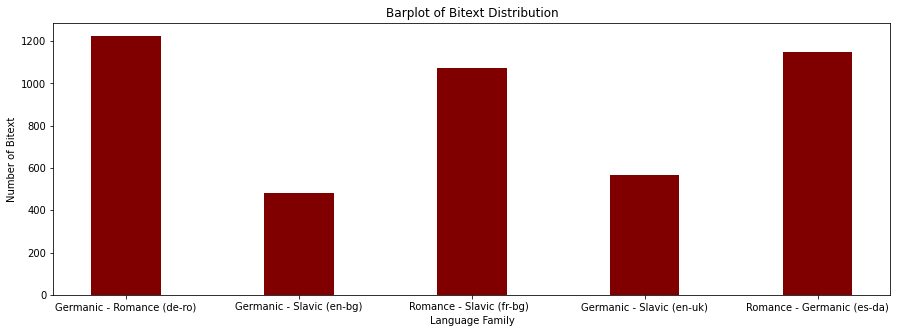

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 5))
plt.xlabel("Language Family")
plt.ylabel("Number of Bitext")
plt.title("Barplot of Bitext Distribution")
plt.bar([x[0] for x in stats], [x[1] for x in stats], color ='maroon',
        width = 0.4)

# **INFERENTIAL STATISTICS**

In [12]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
germanic_romance_scores = pd.read_csv("germanic_romance_metrics.csv", index_col = 0)
germanic_slavic_scores = pd.read_csv("germanic_slavic_metrics.csv", index_col = 0)
romance_germanic_scrores = pd.read_csv("romance_germanic_metrics.csv", index_col = 0)
slavic_germanic_scores = pd.read_csv("slavic_germanic_metrics.csv", index_col = 0)

FileNotFoundError: ignored

**SLAVIC - GERMANIC : ru-da**

In [ ]:
slavic_germanic_scores.head()

bleu_direct  cosim_direct  bleu_pivot  cosim_pivot 
0         0.74          0.95        0.76          0.94
1         0.71          0.98        0.66          0.97
2         0.71          0.91        0.69          0.93
3         0.66          0.96        0.66          0.96
4         0.46          0.91        0.53          0.90

In [ ]:
import statistics
print(mean(slavic_germanic_scores["cosim_direct"]))
print(statistics.stdev(slavic_germanic_scores["cosim_direct"]))

0.8192688413948257
0.11953447852115899


In [ ]:
import statistics
print(mean(slavic_germanic_scores["cosim_pivot "]))
print(statistics.stdev(slavic_germanic_scores["cosim_pivot "]))

0.8213329583802025
0.11653393526786343


In [ ]:
import statistics
print(mean(slavic_germanic_scores["bleu_direct"]))
print(statistics.stdev(slavic_germanic_scores["bleu_direct"]))

0.47244094488188976
0.20510042052163138


In [ ]:
import statistics
print(mean(slavic_germanic_scores["bleu_pivot"]))
print(statistics.stdev(slavic_germanic_scores["bleu_pivot"]))

0.46752530933633296
0.2044743062164287


In [ ]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = slavic_germanic_scores["cosim_direct"]
x2 = slavic_germanic_scores["cosim_pivot "]
x3 = slavic_germanic_scores["bleu_direct"]
x4 = slavic_germanic_scores["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

**Germanic - Romance**

**de-ro; de-es-ro**

In [ ]:
germanic_romance_scores.head()

bleu_direct  cosim_direct  bleu_pivot  cosim_pivot 
0         0.83          0.94        1.00          1.00
1         0.62          0.92        0.57          0.94
2         0.69          0.97        0.83          0.98
3         0.80          0.99        0.90          0.99
4         0.38          0.80        0.44          0.81

In [ ]:
import statistics
print(mean(germanic_romance_scores["cosim_direct"]))
print(statistics.stdev(germanic_romance_scores["cosim_direct"]))

0.8050402476780186
0.15938654933520727


In [ ]:
print(mean(germanic_romance_scores["cosim_pivot "]))
print(statistics.stdev(germanic_romance_scores["cosim_pivot "]))

0.9010959752321981
0.11932160608087429


In [ ]:
import statistics
print(mean(germanic_romance_scores["bleu_direct"]))
print(statistics.stdev(germanic_romance_scores["bleu_direct"]))

0.43426625386996903
0.26921164625177996


In [ ]:
import statistics
print(mean(germanic_romance_scores["bleu_pivot"]))
print(statistics.stdev(germanic_romance_scores["bleu_pivot"]))

0.6603095975232198
0.2648202556125109


In [ ]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = germanic_romance_scores["cosim_direct"]
x2 = germanic_romance_scores["cosim_pivot "]
x3 = germanic_romance_scores["bleu_direct"]
x4 = germanic_romance_scores["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

**EN AS PIVOT**

In [ ]:
en_as_pivot = pd.read_csv("germanic_romance_metrics_en_as_pivot.csv", index_col = 0)

In [ ]:
import statistics
print(mean(en_as_pivot["cosim_direct"]))
print(statistics.stdev(en_as_pivot["cosim_direct"]))

0.8036718266253869
0.16011018137054156


In [ ]:
import statistics
print(mean(en_as_pivot["cosim_pivot "]))
print(statistics.stdev(en_as_pivot["cosim_pivot "]))

0.9007678018575851
0.11798769159993305


In [ ]:
import statistics
print(mean(en_as_pivot["bleu_direct"]))
print(statistics.stdev(en_as_pivot["bleu_direct"]))

0.43007430340557273
0.27109785414162335


In [ ]:
import statistics
print(mean(en_as_pivot["bleu_pivot"]))
print(statistics.stdev(en_as_pivot["bleu_pivot"]))

0.6623653250773994
0.26152512899677705


In [ ]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = en_as_pivot["cosim_direct"]
x2 = en_as_pivot["cosim_pivot "]
x3 = en_as_pivot["bleu_direct"]
x4 = en_as_pivot["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

**GERMANIC - SLAVIC**

**en-uk; en-ru-uk**

In [ ]:
import statistics
print(mean(germanic_slavic_scores["cosim_direct"]))
print(statistics.stdev(germanic_slavic_scores["cosim_direct"]))

0.9241222459132907
0.0747632154747534


In [ ]:
print(mean(germanic_slavic_scores["cosim_pivot "]))
print(statistics.stdev(germanic_slavic_scores["cosim_pivot "]))

0.9193319118692252
0.06615841584105685


In [ ]:
import statistics
print(mean(germanic_slavic_scores["bleu_direct"]))
print(statistics.stdev(germanic_slavic_scores["bleu_direct"]))

0.4929637526652452
0.22632027865112747


In [ ]:
import statistics
print(mean(germanic_slavic_scores["bleu_pivot"]))
print(statistics.stdev(germanic_slavic_scores["bleu_pivot"]))

0.4561904761904762
0.19986869970353371


In [ ]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = germanic_slavic_scores["cosim_direct"]
x2 = germanic_slavic_scores["cosim_pivot "]
x3 = germanic_slavic_scores["bleu_direct"]
x4 = germanic_slavic_scores["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.0)
fig.show()

**ROMANCE - GERMANIC**

**es-da: es-de-da**

In [ ]:
import statistics
print(mean(romance_germanic_scrores["cosim_direct"]))
print(statistics.stdev(romance_germanic_scrores["cosim_direct"]))

0.9125399872040947
0.12218250096001844


In [ ]:
print(mean(romance_germanic_scrores["cosim_pivot "]))
print(statistics.stdev(romance_germanic_scrores["cosim_pivot "]))

0.9072104926423544
0.12433855147455965


In [ ]:
import statistics
print(mean(romance_germanic_scrores["bleu_direct"]))
print(statistics.stdev(romance_germanic_scrores["bleu_direct"]))

0.7185092770313499
0.25946120995659494


In [ ]:
import statistics
print(mean(romance_germanic_scrores["bleu_pivot"]))
print(statistics.stdev(romance_germanic_scrores["bleu_pivot"]))

0.6793985924504159
0.26104247165597555


In [ ]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = romance_germanic_scrores["cosim_direct"]
x2 = romance_germanic_scrores["cosim_pivot "]
x3 = romance_germanic_scrores["bleu_direct"]
x4 = romance_germanic_scrores["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.1)
fig.show()

# **REMOVE OUTLIERS**

In [27]:
!ls

germanic_romance_de_ro.csv
germanic_romance_en_as_pivot.csv
germanic_romance_metrics_de_ro.csv
germanic_romance_metrics_en_as_pivot_de_ro.csv
germanic_slavic_en_bg.csv
germanic_slavic_en_bg_de_as_pivot.csv
germanic_slavic_en_uk.csv
germanic_slavic_en_uk_fr_as_pivot.csv
germanic_slavic_metrics_en_bg.csv
germanic_slavic_metrics_en_bg_de_as_pivot.csv
germanic_slavic_metrics_en_uk.csv
germanic_slavic_metrics_en_uk_fr_as_pivot.csv
romance_germanic_es_da.csv
romance_germanic_es_da_ru_as_pivot.csv
romance_germanic_metrics_es_da.csv
romance_slavic_fr_bg.csv
romance_slavic_fr_bg_en_as_pivot.csv
romance_slavic_metrics_es_da_ru_as_pivot.csv
romance_slavic_metrics_fr_bg.csv


In [48]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
germanic_romance_scores = pd.read_csv("germanic_romance_metrics_de_ro.csv", index_col = 0).dropna()
germanic_slavic_scores_bg = pd.read_csv("germanic_slavic_metrics_en_bg.csv", index_col = 0).dropna()
germanic_slavic_scores_uk = pd.read_csv("germanic_slavic_metrics_en_uk.csv", index_col = 0).dropna()
romance_germanic_scrores = pd.read_csv("romance_germanic_metrics_es_da.csv", index_col = 0).dropna()
romance_slavic_scores = pd.read_csv("romance_slavic_metrics_fr_bg.csv", index_col = 0).dropna()

en_as_pivot = pd.read_csv("germanic_romance_metrics_en_as_pivot_de_ro.csv", index_col = 0).dropna()

In [4]:
import plotly.express as px
import matplotlib.pyplot as plt #es-da

fig = px.box(romance_germanic_scrores, y="cosim_direct", title = "Boxplot of DT Cosine Similarity Scores Distribution ROMANCE-GERMANIC es-da")

fig.show()

In [3]:
import plotly.express as px
fig = px.box(romance_germanic_scrores, y="bleu_direct", title = "Boxplot of DT BLEU Scores Distribution ROMANCE-GERMANIC (es-da)")

fig.show()

In [20]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR= q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [6]:
outliers = find_outliers_IQR(romance_germanic_scrores["bleu_direct"])
print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 79
max outlier value: 0.17
min outlier value: 0.0


In [8]:
outliers = find_outliers_IQR(romance_germanic_scrores[["bleu_direct","bleu_pivot"]])
outliers

bleu_direct  bleu_pivot
0             NaN         NaN
1             NaN         NaN
2             NaN         NaN
3             NaN         NaN
4             NaN         NaN
...           ...         ...
1141          NaN         NaN
1142          NaN         NaN
1143          NaN         NaN
1144          NaN         NaN
1145          NaN         NaN

[1146 rows x 2 columns]

In [9]:
out_ = [x for x in outliers["bleu_direct"]]
len(out_)
for i , x in enumerate(out_):
  if x < 0.12:
    print(i,x)

45 0.02
46 0.01
67 0.01
80 0.02
88 0.11
94 0.01
108 0.08
115 0.03
123 0.01
135 0.06
144 0.06
149 0.06
153 0.01
155 0.02
166 0.1
174 0.01
177 0.03
284 0.02
318 0.03
372 0.08
373 0.0
384 0.06
418 0.1
429 0.08
436 0.07
444 0.07
449 0.01
458 0.0
465 0.0
503 0.02
675 0.1
786 0.01
788 0.02
789 0.01
807 0.01
809 0.01
821 0.11
832 0.1
834 0.05
921 0.04
947 0.1
973 0.0
1019 0.0
1021 0.04
1024 0.08
1027 0.05
1033 0.02
1034 0.03
1037 0.04
1038 0.01
1039 0.01
1041 0.01
1050 0.11
1052 0.05
1053 0.01
1054 0.02
1062 0.09
1069 0.07
1075 0.01
1081 0.02
1085 0.05
1094 0.11
1114 0.11
1116 0.05
1121 0.0
1122 0.04
1132 0.01


In [10]:
romance_germanic_scrores["bleu_direct"][973]

0.0

In [13]:
pd.read_csv("romance_germanic_es_da.csv", index_col = 0)["direct_translation"][591]

'187 minimumsoplysninger, der skal indgå i mindre primær emballage'

In [15]:
pd.read_csv("romance_germanic_es_da.csv", index_col = 0)["human_translation"][973]

'andre forstyrrelser af mineralmetabolismen skal også behandles effektivt .'

In [16]:
pd.read_csv("romance_germanic_es_da.csv", index_col = 0)["original"][973]

'.'

In [40]:
outliers = find_outliers_IQR(romance_germanic_scrores[["cosim_direct", "cosim_pivot "]])
print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 1146
max outlier value: cosim_direct    0.72
cosim_pivot     0.72
dtype: float64
min outlier value: cosim_direct    0.28
cosim_pivot     0.28
dtype: float64


In [26]:
romance_germanic_scrores.head()

bleu_direct  cosim_direct  bleu_pivot  cosim_pivot 
0         0.89          0.98        0.89          0.98
1         0.72          0.97        0.75          0.97
2         0.77          0.96        0.74          0.93
3         0.62          0.96        0.78          0.98
4         0.62          0.86        0.62          0.86

In [41]:
out_ = [x for x in outliers["cosim_direct"]]
# len(out_)
for i , x in enumerate(out_):
  if x < 0.71:
    print(i,x)

29 0.58
45 0.42
46 0.4
67 0.39
80 0.48
94 0.46
115 0.6
123 0.41
155 0.42
174 0.47
177 0.56
284 0.61
290 0.65
318 0.63
361 0.5
373 0.69
429 0.67
442 0.7
443 0.68
444 0.46
458 0.55
465 0.63
476 0.66
487 0.65
495 0.66
503 0.68
525 0.68
712 0.57
786 0.34
788 0.43
789 0.48
807 0.38
809 0.57
819 0.66
831 0.58
832 0.68
904 0.66
921 0.57
923 0.56
947 0.68
973 0.56
988 0.61
1003 0.48
1004 0.66
1018 0.61
1019 0.68
1027 0.52
1033 0.44
1034 0.39
1037 0.45
1038 0.37
1039 0.55
1041 0.28
1050 0.6
1052 0.53
1053 0.55
1054 0.46
1055 0.6
1062 0.54
1069 0.6
1075 0.53
1081 0.68
1085 0.63
1088 0.69
1094 0.54
1102 0.68
1105 0.59
1108 0.64
1110 0.32
1111 0.45
1112 0.62
1114 0.53
1116 0.47
1118 0.7
1119 0.53
1122 0.36
1125 0.51
1126 0.56
1132 0.5
1137 0.66
1145 0.63


In [46]:
pd.read_csv("romance_germanic_es_da.csv", index_col = 0)["original"][373]

'para consultar la lista completa de excipientes, secciónver sección 6.1.'

In [45]:
pd.read_csv("romance_germanic_es_da.csv", index_col = 0)["human_translation"][373]

'alle indholdsstoffer er anført under afsnit 6. 1.'

In [ ]:
1436

In [ ]:
pd.read_csv("romance_germanic.csv", index_col = 0)["original"][1436]

'depresión mayor y/ o tratamiento antidepresivo en el momento actual .'

In [ ]:
pd.read_csv("romance_germanic.csv", index_col = 0)["human_translation"][1436]

'4. 4).'

**ROMANCE - SLAVIC : FR-BG: removed**

In [40]:
!ls

germanic_romance_de_ro.csv
germanic_romance_en_as_pivot.csv
germanic_romance_metrics_de_ro.csv
germanic_romance_metrics_en_as_pivot_de_ro.csv
germanic_slavic_en_bg.csv
germanic_slavic_en_bg_de_as_pivot.csv
germanic_slavic_en_uk.csv
germanic_slavic_en_uk_fr_as_pivot.csv
germanic_slavic_metrics_en_bg.csv
germanic_slavic_metrics_en_bg_de_as_pivot.csv
germanic_slavic_metrics_en_uk.csv
germanic_slavic_metrics_en_uk_fr_as_pivot.csv
romance_germanic_es_da.csv
romance_germanic_es_da_ru_as_pivot.csv
romance_germanic_metrics_es_da.csv
romance_germanic_metrics_es_da_ru_as_pivot.csv
romance_slavic_fr_bg.csv
romance_slavic_fr_bg_en_as_pivot.csv
romance_slavic_metrics_fr_bg.csv
romance_slavic_metrics_fr_bg_en_as_pivot.csv


In [41]:
os.chdir("/content/drive/MyDrive/tesi/chapters/2nd/translated_data")
germanic_romance_scores = pd.read_csv("germanic_romance_metrics_de_ro.csv", index_col = 0).dropna()
germanic_slavic_scores_bg = pd.read_csv("germanic_slavic_metrics_en_bg.csv", index_col = 0).dropna()
germanic_slavic_scores_uk = pd.read_csv("germanic_slavic_metrics_en_uk.csv", index_col = 0).dropna()
romance_germanic_scrores = pd.read_csv("romance_germanic_metrics_es_da.csv", index_col = 0).dropna()
romance_slavic_scores = pd.read_csv("romance_slavic_metrics_fr_bg.csv", index_col = 0).dropna()

en_as_pivot_germanic_romance = pd.read_csv("germanic_romance_metrics_en_as_pivot_de_ro.csv", index_col = 0).dropna() #de-ro

ru_as_pivot_romance_germanic = pd.read_csv("romance_germanic_metrics_es_da_ru_as_pivot.csv", index_col = 0).dropna() #es-da

fr_as_pivot_germanic_slavic_uk = pd.read_csv("germanic_slavic_metrics_en_uk_fr_as_pivot.csv", index_col = 0).dropna() #en-uk

de_as_pivot_germanic_slavic_bg = pd.read_csv("germanic_slavic_metrics_en_bg_de_as_pivot.csv", index_col = 0).dropna() #en-bg

en_as_pivot_romance_slavic = pd.read_csv("romance_slavic_metrics_fr_bg_en_as_pivot.csv", index_col = 0).dropna() #fr-bg

In [21]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
import plotly.express as px
fig = px.box(romance_slavic_scores , y="bleu_direct", title = "Boxplot of BLEU Scores Distribution SLAVIC-GERMANIC (DT)")

fig.show()

In [ ]:
[i for i,x in enumerate(romance_slavic_scores["bleu_direct"]) if x == 0]

[509, 823, 973, 988]

In [ ]:
pd.read_csv("romance_slavic_fr_bg.csv")["original"][509]

'les effets indésirables fréquents  sont: • infection pulmonaire'

In [ ]:
pd.read_csv("romance_slavic_fr_bg.csv")["human_translation"][509]

'нечестите нежелани реакции  са: • повишено кръвно налягане, повишено тегло, повишена млечна киселина в кръвта, намалена бъбречна функция, повишена кръвна захар, повишено ниво на фосфор в кръвта, понижено ниво на калий в кръвта • нарушение на нервите, намалени рефлекси или липса на рефлекси, неволни движения, болка по протежението на даден нерв, загуба на чувствителност, припадък, замайване при изправяне, болезнено изтръпване или мравучкане, треперене • дразнение в очите, болка в очите, зачервяване на очите, сърбеж на очите, замъглено или двойно виждане, намалено зрение или виждане на блясващи светлини • болка в ухото, пищене в ушите • кашлица с храчки, недостиг на въздух при вървене или при изкачване на стълби, запушване на носа, хрема или сухота в носа, намалени дихателни звуци, вода в белия дроб, загуба на гласа, затруднено дишане • затруднено преглъщане, газове, сухота в устата, рехави изпражнения, киселини, стомашни спазми, болезненост или възпаление на устата и венците, ректално 

In [ ]:
outliers = find_outliers_IQR(romance_slavic_scores["bleu_direct"])
print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [ ]:
outliers = find_outliers_IQR(romance_slavic_scores["cosim_pivot "])
print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 138
max outlier value: 0.53
min outlier value: 0.22


In [ ]:
# index_names = [i for i, score in enumerate(slavic_germanic_scores['cosim_pivot ']) if score < 0.53]

In [ ]:
# index_names

[47,
 261,
 545,
 685,
 784,
 788,
 812,
 946,
 1020,
 1034,
 1173,
 1189,
 1201,
 1204,
 1388,
 1445,
 1462,
 1475,
 1517,
 1621,
 1664,
 1685,
 1694,
 1697,
 1748]

In [ ]:
# slavic_germanic_scores.drop(index_names, inplace = True)

In [ ]:
romance_slavic_scores

bleu_direct  cosim_direct  bleu_pivot  cosim_pivot 
0            0.68          0.98        0.59          0.97
1            0.93          1.00        0.57          0.95
2            0.92          0.99        0.74          0.99
3            0.91          1.00        0.52          0.95
4            0.97          1.00        0.25          0.89
...           ...           ...         ...           ...
1987         0.12          0.96        0.22          0.97
1988         0.60          0.95        0.08          0.76
1989         0.86          0.99        0.05          0.45
1990         0.54          0.94        0.42          0.94
1991         0.18          0.69        0.03          0.58

[1992 rows x 4 columns]

In [ ]:
import plotly.express as px
fig = px.box(romance_slavic_scores, y= "bleu_pivot", title = "Boxplot of BLEU Scores Distribution SLAVIC-GERMANIC (PT)")

fig.show()

In [ ]:
import plotly.express as px
fig = px.box(romance_slavic_scores, y="cosim_direct")

fig.show()

In [ ]:
import plotly.express as px
fig = px.box(romance_slavic_scores, y="cosim_pivot ")

fig.show()

In [ ]:
new_data = remove_outlier(romance_slavic_scores, "cosim_direct")
nou_out = remove_outlier(new_data, "bleu_pivot")
no_out = remove_outlier(nou_out, "cosim_pivot ")
no_outliers = remove_outlier(new_data, "cosim_pivot ")

In [ ]:
col_names  = [colname for colname in romance_slavic_scores.columns]

In [ ]:
for col in col_names:
  no_outliers = remove_outlier(romance_slavic_scores, col)

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

fig = px.box(no_outliers, y="cosim_pivot ")

fig.show()

In [ ]:
import statistics
print(mean(no_outliers["cosim_direct"]))
print(statistics.stdev(no_outliers["cosim_direct"]))

0.9741693811074918
0.029499255269656924


In [ ]:
import statistics
print(mean(no_outliers["cosim_pivot "]))
print(statistics.stdev(no_outliers["cosim_pivot "]))

0.9573181324647122
0.025040744779603025


In [ ]:
import statistics
print(mean(no_outliers["bleu_direct"]))
print(statistics.stdev(no_outliers["bleu_direct"]))

0.699771986970684
0.21624174303729732


In [ ]:
import statistics
print(mean(no_outliers["bleu_pivot"]))
print(statistics.stdev(no_outliers["bleu_pivot"]))

0.5221172638436482
0.16062030346882786


In [ ]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = no_outliers["cosim_direct"]
x2 = no_outliers["cosim_pivot "]
x3 = no_outliers["bleu_direct"]
x4 = no_outliers["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.0)
fig.show()

**ENGLISH AS PIVOT: FR-EN-BG**

In [ ]:
en_as_pivot_romance_slavic

In [45]:
col_names  = [colname for colname in en_as_pivot_romance_slavic.columns]

for col in col_names:
  no_outliers = remove_outlier(en_as_pivot_romance_slavic, col)

In [46]:
import statistics
print(mean(no_outliers["cosim_direct"]))
print(statistics.stdev(no_outliers["cosim_direct"]))

0.9693195876288659
0.041404034141293865


In [47]:
import statistics
print(mean(no_outliers["cosim_pivot "]))
print(statistics.stdev(no_outliers["cosim_pivot "]))

0.941020618556701
0.046298372607668836


In [48]:
import statistics
print(mean(no_outliers["bleu_pivot"]))
print(statistics.stdev(no_outliers["bleu_pivot"]))

0.4713814432989691
0.24107676595979555


In [49]:
import statistics
print(mean(no_outliers["bleu_direct"]))
print(statistics.stdev(no_outliers["bleu_direct"]))

0.6867113402061855
0.2333385135248162


In [50]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = no_outliers["cosim_direct"]
x2 = no_outliers["cosim_pivot "]
x3 = no_outliers["bleu_direct"]
x4 = no_outliers["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.0)
fig.show()

**GERMANIC-ROMANCE**

In [ ]:
germanic_romance_scores #de-ro

bleu_direct  cosim_direct  bleu_pivot  cosim_pivot 
0            0.07          0.59        1.00          1.00
1            0.02          0.69        0.01          0.71
2            0.80          0.89        0.94          1.00
3            0.83          0.94        1.00          1.00
4            0.81          0.90        0.97          1.00
...           ...           ...         ...           ...
2327         0.82          0.99        0.76          0.98
2328         0.18          0.53        0.72          0.92
2329         0.32          0.85        0.80          0.96
2330         0.50          0.70        0.56          0.96
2331         0.65          0.90        0.80          0.96

[2332 rows x 4 columns]

In [ ]:
#identification
import plotly.express as px
fig = px.box(germanic_romance_scores, y="bleu_direct")

fig.show()

In [ ]:
import plotly.express as px
fig = px.box(germanic_romance_scores, y="bleu_pivot")

fig.show()

In [ ]:
# germanic_romance_scores.drop(germanic_romance_scores[germanic_romance_scores['bleu_pivot'] <= 0.25].index, inplace = True)

In [ ]:
import plotly.express as px
fig = px.box(germanic_romance_scores, y="cosim_direct")

fig.show()

In [ ]:
import plotly.express as px
fig = px.box(germanic_romance_scores, y="cosim_pivot ")

fig.show()

In [ ]:
# removal
for col in col_names: #de-ro
  no_outliers = remove_outlier(germanic_romance_scores, col)

In [ ]:
#mean & stdev
import statistics
print(mean(no_outliers["cosim_direct"]))
print(statistics.stdev(no_outliers["cosim_direct"]))

0.8479523389232128
0.12805368734645184


In [ ]:
import statistics
print(mean(no_outliers["cosim_pivot "]))
print(statistics.stdev(no_outliers["cosim_pivot "]))

0.9294527802294793
0.06547772747144888


In [ ]:
import statistics
print(mean(no_outliers["bleu_direct"]))
print(statistics.stdev(no_outliers["bleu_direct"]))

0.5005207413945278
0.24720235477685826


In [ ]:
import statistics
print(mean(no_outliers["bleu_pivot"]))
print(statistics.stdev(no_outliers["bleu_pivot"]))

0.7038658428949691
0.21125668828795882


In [ ]:
# plot data
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = no_outliers["cosim_direct"]
x2 = no_outliers["cosim_pivot "]
x3 = no_outliers["bleu_direct"]
x4 = no_outliers["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.0)
fig.show()

**EN-AS-PIVOT**

In [ ]:
en_as_pivot = pd.read_csv("germanic_romance_metrics_en_as_pivot_de_ro.csv", index_col = 0)

In [ ]:
#identification
import plotly.express as px
fig = px.box(en_as_pivot, y="bleu_direct")

fig.show()

In [ ]:
# en_as_pivot.drop(en_as_pivot[en_as_pivot['bleu_direct'] <= 0.25].index, inplace = True)

In [ ]:
import plotly.express as px
fig = px.box(en_as_pivot, y="bleu_pivot")

fig.show()

In [ ]:
#identification
import plotly.express as px
fig = px.box(en_as_pivot, y="cosim_pivot ")

fig.show()

In [ ]:
#identification
import plotly.express as px
fig = px.box(en_as_pivot, y="cosim_direct")

fig.show()

In [ ]:
# removal
for col in col_names:
  no_outliers = remove_outlier(en_as_pivot, col)

In [ ]:
#mean & stdev
import statistics
print(mean(no_outliers["cosim_direct"]))
print(statistics.stdev(no_outliers["cosim_direct"]))

0.847295154185022
0.1287759361501498


In [ ]:
import statistics
print(mean(no_outliers["cosim_pivot "]))
print(statistics.stdev(no_outliers["cosim_pivot "]))

0.9277709251101321
0.06607048532021337


In [ ]:
import statistics
print(mean(no_outliers["bleu_direct"]))
print(statistics.stdev(no_outliers["bleu_direct"]))

0.4988546255506608
0.2486632888638478


In [ ]:
import statistics
print(mean(no_outliers["bleu_pivot"]))
print(statistics.stdev(no_outliers["bleu_pivot"]))

0.7038149779735683
0.21086782377894564


In [ ]:
# plot data
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = no_outliers["cosim_direct"]
x2 = no_outliers["cosim_pivot "]
x3 = no_outliers["bleu_direct"]
x4 = no_outliers["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.0)
fig.show()

**GERMANIC - SLAVIC: new dataset en-uk**

In [ ]:
import plotly.express as px
fig = px.box(germanic_slavic_scores_uk, y="bleu_direct")

fig.show()

In [ ]:
import plotly.express as px
fig = px.box(germanic_slavic_scores_uk , y="bleu_pivot")

fig.show()

In [ ]:

# germanic_slavic_scores.drop(germanic_slavic_scores[germanic_slavic_scores['bleu_pivot'] <= 0.25].index, inplace = True)

In [ ]:
import plotly.express as px
fig = px.box(germanic_slavic_scores_uk, y="cosim_pivot ")

fig.show()

In [ ]:
import plotly.express as px
fig = px.box(germanic_slavic_scores_uk, y="cosim_direct")

fig.show()

In [ ]:
for col in col_names:
  no_outliers = remove_outlier(germanic_slavic_scores_uk, col)

In [ ]:
import statistics
print(mean(no_outliers["cosim_direct"]))
print(statistics.stdev(no_outliers["cosim_direct"]))

0.9737918215613383
0.029365248974383043


In [ ]:
import statistics
print(mean(no_outliers["cosim_pivot "]))
print(statistics.stdev(no_outliers["cosim_pivot "]))

0.9734200743494423
0.01962910577848596


In [ ]:
import statistics
print(mean(no_outliers["bleu_direct"]))
print(statistics.stdev(no_outliers["bleu_direct"]))

0.7357063197026023
0.18572712607575506


In [ ]:
import statistics
print(mean(no_outliers["bleu_pivot"]))
print(statistics.stdev(no_outliers["bleu_pivot"]))

0.6977695167286245
0.15769713458754314


In [ ]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = no_outliers["cosim_direct"]
x2 = no_outliers["cosim_pivot "]
x3 = no_outliers["bleu_direct"]
x4 = no_outliers["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.0)
fig.show()

**FRENCH AS PIVOT: EN-FR-UK**

In [ ]:


fr_as_pivot_germanic_slavic_uk = pd.read_csv("germanic_slavic_metrics_en_uk_fr_as_pivot.csv", index_col = 0).dropna() #en-uk



In [51]:
for col in col_names:
  no_outliers = remove_outlier(fr_as_pivot_germanic_slavic_uk, col)

In [52]:
import statistics
print(mean(no_outliers["cosim_direct"]))
print(statistics.stdev(no_outliers["cosim_direct"]))

0.9741834862385321
0.028051346413637917


In [53]:
import statistics
print(mean(no_outliers["cosim_pivot "]))
print(statistics.stdev(no_outliers["cosim_pivot "]))

0.958697247706422
0.029851810649081264


In [54]:
import statistics
print(mean(no_outliers["bleu_direct"]))
print(statistics.stdev(no_outliers["bleu_direct"]))

0.7364770642201834
0.1862035372528755


In [56]:
import statistics
print(mean(no_outliers["bleu_pivot"]))
print(statistics.stdev(no_outliers["bleu_pivot"]))

0.609137614678899
0.18807507241956153


**EN-BG**

In [49]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = germanic_slavic_scores_bg["cosim_direct"]
x2 = germanic_slavic_scores_bg["cosim_pivot "]
x3 = germanic_slavic_scores_bg["bleu_direct"]
x4 = germanic_slavic_scores_bg["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.0)
fig.show()

In [50]:
import statistics
print(mean(germanic_slavic_scores_bg["cosim_direct"]))
print(statistics.stdev(germanic_slavic_scores_bg["cosim_direct"]))

0.9396887966804979
0.09262237866816983


In [51]:
import statistics
print(mean(germanic_slavic_scores_bg["cosim_pivot "]))
print(statistics.stdev(germanic_slavic_scores_bg["cosim_pivot "]))

0.9551244813278008
0.0794372427295579


In [52]:
import statistics
print(mean(germanic_slavic_scores_bg["bleu_direct"]))
print(statistics.stdev(germanic_slavic_scores_bg["bleu_direct"]))

0.5202697095435684
0.25510775896779453


In [53]:
import statistics
print(mean(germanic_slavic_scores_bg["bleu_pivot"]))
print(statistics.stdev(germanic_slavic_scores_bg["bleu_pivot"]))

0.5793153526970954
0.21519161343197227


**remove outliers**

In [ ]:
import plotly.express as px
fig = px.box(germanic_slavic_scores_bg, y="bleu_direct")

fig.show()

In [ ]:
import plotly.express as px
fig = px.box(germanic_slavic_scores_bg, y="bleu_pivot")

fig.show()

In [ ]:
import plotly.express as px
fig = px.box(germanic_slavic_scores_bg, y="cosim_direct")

fig.show()

In [ ]:
import plotly.express as px
fig = px.box(germanic_slavic_scores_bg, y="cosim_pivot ")

fig.show()

In [ ]:
for col in col_names:
  no_outliers = remove_outlier(germanic_slavic_scores_bg, col)

In [ ]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = no_outliers["cosim_direct"]
x2 = no_outliers["cosim_pivot "]
x3 = no_outliers["bleu_direct"]
x4 = no_outliers["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.0)
fig.show()

In [ ]:
import statistics
print(mean(no_outliers["cosim_direct"]))
print(statistics.stdev(no_outliers["cosim_direct"]))

0.9567441860465116
0.04846938957760776


In [ ]:
import statistics
print(mean(no_outliers["cosim_pivot "]))
print(statistics.stdev(no_outliers["cosim_pivot "]))

0.9748139534883721
0.01495409574904118


In [ ]:
import statistics
print(mean(no_outliers["bleu_direct"]))
print(statistics.stdev(no_outliers["bleu_direct"]))

0.5518837209302325
0.23245108358788236


In [ ]:
import statistics
print(mean(no_outliers["bleu_pivot"]))
print(statistics.stdev(no_outliers["bleu_pivot"]))

0.6312325581395349
0.1540899046154432


**GERMAN AS PIVOT: EN-DE-BG**

In [ ]:


de_as_pivot_germanic_slavic_bg = pd.read_csv("germanic_slavic_metrics_en_bg_de_as_pivot.csv", index_col = 0).dropna() #en-bg

In [57]:
for col in col_names:
  no_outliers = remove_outlier(de_as_pivot_germanic_slavic_bg, col)

In [58]:
import statistics
print(mean(no_outliers["cosim_direct"]))
print(statistics.stdev(no_outliers["cosim_direct"]))

0.9569745958429561
0.05136418446473654


In [59]:
import statistics
print(mean(no_outliers["cosim_pivot "]))
print(statistics.stdev(no_outliers["cosim_pivot "]))

0.9819168591224018
0.01237053388623833


In [60]:
import statistics
print(mean(no_outliers["bleu_direct"]))
print(statistics.stdev(no_outliers["bleu_direct"]))

0.5544341801385682
0.23695740345310165


In [61]:
import statistics
print(mean(no_outliers["bleu_pivot"]))
print(statistics.stdev(no_outliers["bleu_pivot"]))

0.712378752886836
0.14755295568947566


In [62]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = no_outliers["cosim_direct"]
x2 = no_outliers["cosim_pivot "]
x3 = no_outliers["bleu_direct"]
x4 = no_outliers["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.0)
fig.show()

**ROMANCE - GERMANIC**

In [ ]:
!ls

germanic_romance_de_ro.csv
germanic_romance_en_as_pivot.csv
germanic_romance_metrics_de_ro.csv
germanic_romance_metrics_en_as_pivot_de_ro.csv
germanic_slavic_en_bg.csv
germanic_slavic_en_uk.csv
germanic_slavic_metrics_en_bg.csv
germanic_slavic_metrics_en_uk.csv
romance_germanic_es_da.csv
romance_germanic_metrics_es_da.csv
romance_slavic_fr_bg.csv
romance_slavic_metrics_fr_bg.csv


In [ ]:
import plotly.express as px
fig = px.box(romance_germanic_scrores, y="bleu_pivot") #es-da

fig.show()

In [ ]:
import plotly.express as px
fig = px.box(romance_germanic_scrores, y="bleu_direct")

fig.show()

In [ ]:
import plotly.express as px
fig = px.box(romance_germanic_scrores, y="cosim_direct")

fig.show()

In [ ]:
import plotly.express as px
fig = px.box(romance_germanic_scrores, y="cosim_pivot ")

fig.show()

In [ ]:
for col in col_names:
  no_outliers = remove_outlier(romance_germanic_scrores, col)

In [ ]:
import statistics
print(mean(no_outliers["cosim_direct"]))
print(statistics.stdev(no_outliers["cosim_direct"])) 

0.9369874879692012
0.06760470247738311


In [ ]:
import statistics
print(mean(no_outliers["cosim_pivot "]))
print(statistics.stdev(no_outliers["cosim_pivot "]))

0.936390760346487
0.06077347743891753


In [ ]:
import statistics
print(mean(no_outliers["bleu_pivot"]))
print(statistics.stdev(no_outliers["bleu_pivot"]))

0.70888354186718
0.20398417169261748


In [ ]:
import statistics
print(mean(no_outliers["bleu_direct"]))
print(statistics.stdev(no_outliers["bleu_direct"]))

0.7416169393647738
0.20069168337138069


In [ ]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = no_outliers["cosim_direct"]
x2 = no_outliers["cosim_pivot "]
x3 = no_outliers["bleu_direct"]
x4 = no_outliers["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.0)
fig.show()

**RUSSIAN AS PIVOT: ES-RU-DA**

In [25]:
ru_as_pivot_romance_germanic = pd.read_csv("romance_germanic_metrics_es_da_ru_as_pivot.csv", index_col = 0).dropna() #es-da

In [26]:
col_names = [col for col in ru_as_pivot_romance_germanic.columns]

for col in col_names:
  no_outliers = remove_outlier( ru_as_pivot_romance_germanic, col)


In [27]:
import statistics
print(mean(no_outliers["cosim_direct"]))
print(statistics.stdev(no_outliers["cosim_direct"]))

0.9248144712430426
0.08626422288903239


In [28]:
import statistics
print(mean(no_outliers["cosim_pivot "]))
print(statistics.stdev(no_outliers["cosim_pivot "]))

0.8691929499072356
0.08421023050358183


In [29]:
import statistics
print(mean(no_outliers["bleu_direct"]))
print(statistics.stdev(no_outliers["bleu_direct"]))

0.7206864564007421
0.2222236988964488


In [30]:
import statistics
print(mean(no_outliers["bleu_pivot"]))
print(statistics.stdev(no_outliers["bleu_pivot"]))

0.5487940630797774
0.18057895204593755


In [31]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = no_outliers["cosim_direct"]
x2 = no_outliers["cosim_pivot "]
x3 = no_outliers["bleu_direct"]
x4 = no_outliers["bleu_pivot"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['COSIM DT', 'COSIM PT', 'BLEU DT', 'BLEU PT']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.0)
fig.show()